In [1]:
import numpy as np
import matplotlib.pyplot as plt
from libs import utils
import random

In [2]:
%matplotlib inline

In [3]:
files = utils.get_celeb_files()
img = plt.imread(files[50])
print(img.shape)

(218, 178, 3)


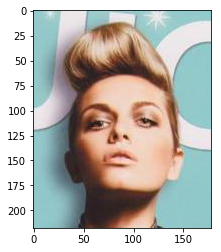

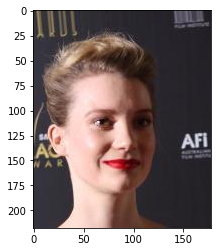

In [4]:
for i in range(2):
    n = random.randint(0, len(files))
    plt.figure()
    plt.imshow(plt.imread(files[n]))

In [5]:
# put all the images into this list
imgs = []
for f in files:
    img = plt.imread(f)
    square = utils.imcrop_tosquare(img)
    imgs.append(square)
    
print(imgs)

[array([[[255, 235, 198],
        [255, 235, 198],
        [255, 235, 198],
        ...,
        [255, 242, 230],
        [249, 242, 232],
        [249, 242, 232]],

       [[255, 235, 198],
        [255, 235, 198],
        [255, 235, 198],
        ...,
        [255, 242, 230],
        [246, 242, 231],
        [246, 242, 231]],

       [[255, 235, 198],
        [255, 235, 198],
        [255, 235, 198],
        ...,
        [255, 243, 229],
        [246, 242, 231],
        [246, 242, 231]],

       ...,

       [[152,  87,  47],
        [174, 109,  69],
        [164,  99,  59],
        ...,
        [153, 103,  76],
        [169, 118,  87],
        [169, 118,  87]],

       [[162,  95,  53],
        [182, 115,  73],
        [182, 117,  75],
        ...,
        [191, 142, 110],
        [166, 116,  83],
        [166, 116,  83]],

       [[192, 125,  82],
        [179, 112,  69],
        [200, 133,  90],
        ...,
        [180, 131,  98],
        [193, 143, 106],
        [193, 143, 106]

In [6]:
data = np.array(imgs)
print(data.shape)

(100, 178, 178, 3)


(178, 178, 3)


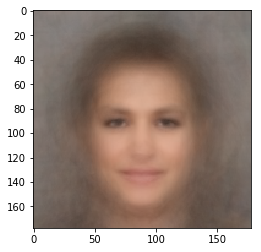

In [7]:
mean_img = np.mean(data, axis=0)
print(mean_img.shape)
plt.imshow(mean_img.astype(np.uint8))

(178, 178, 3)


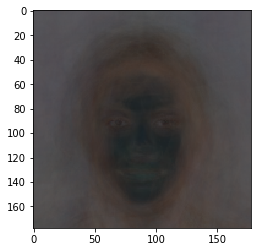

In [8]:
std_img = np.std(data, axis=0)
print(std_img.shape)
plt.imshow(std_img.astype(np.uint8))

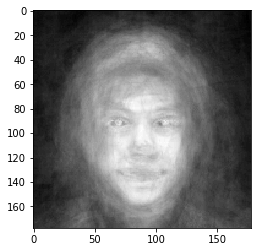

In [9]:
plt.imshow(255 - np.mean(std_img, axis=2).astype(np.uint8), cmap='gray')

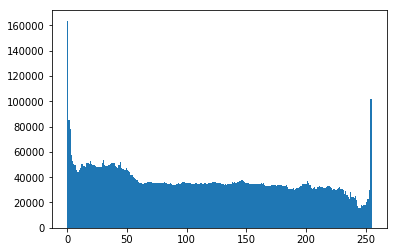

In [10]:
flattened = data.ravel()
hist = plt.hist(flattened.ravel(), 255)

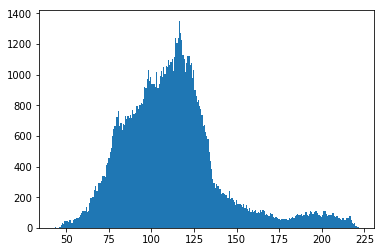

In [11]:
mean_hist = plt.hist(mean_img.ravel(), 255)

Text(0.5,1,'(img - mean) distribution')

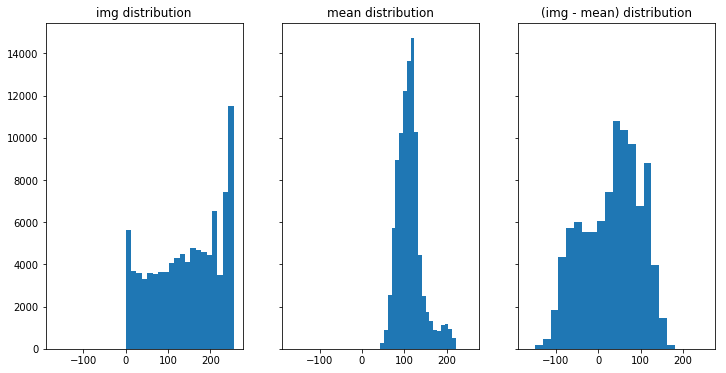

In [12]:
bins = 20
fig, axs = plt.subplots(1, 3, figsize=(12, 6), sharey=True, sharex=True)
axs[0].hist((data[0]).ravel(), bins)
axs[0].set_title('img distribution')
axs[1].hist((mean_img).ravel(), bins)
axs[1].set_title('mean distribution')
axs[2].hist((data[0] - mean_img).ravel(), bins)
axs[2].set_title('(img - mean) distribution')

(-200, 200)

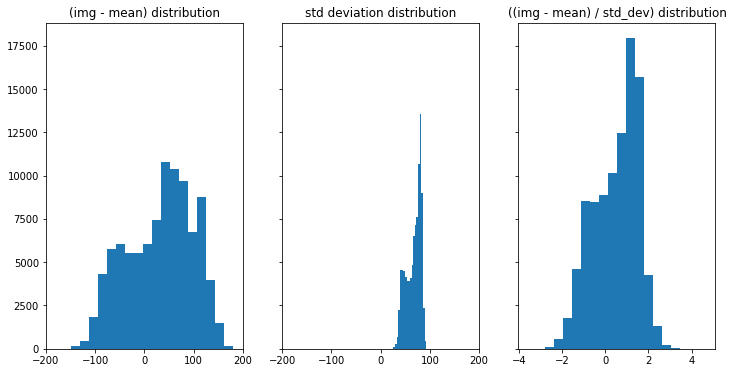

In [13]:
fig, axs = plt.subplots(1, 3, figsize=(12, 6), sharey=True)
axs[0].hist((data[0] - mean_img).ravel(), bins)
axs[0].set_title('(img - mean) distribution')
axs[1].hist((std_img).ravel(), bins)
axs[1].set_title('std deviation distribution')
axs[2].hist(((data[0] - mean_img) / std_img).ravel(), bins)
axs[2].set_title('((img - mean) / std_dev) distribution')

axs[0].set_xlim([-200, 200])
axs[1].set_xlim([-200, 200])

# Tensorflow
session & graph

In [14]:
import tensorflow as tf

In [15]:
x = np.linspace(-3.0, 3.0, 100)
# print(x)
print(x.shape)
print(x.dtype)

(100,)
float64


In [16]:
x = tf.linspace(-3.0, 3.0, 100)
print(x)

Tensor("LinSpace:0", shape=(100,), dtype=float32)


```:0``` means "output of". Thus, the name of the Tensor ```"LinSpace:0"``` means "the output of Linspace.

Think of tf.Tensors the same way as you would the numpy.array. It is described by its shape, in this case, only 1 dimension of 100 values. And it has a dtype, in this case, ```float32```. But unlike the ```numpy.array```, there are no values printed here! That's because it actually hasn't computed its values yet. Instead, it just refers to the output of a ```tf.Operation``` which has been already been added to Tensorflow's default computational graph. The result of that operation is the tensor that we are returned.

In [17]:
print(type(tf.float32))
print(type(x))

<class 'tensorflow.python.framework.dtypes.DType'>
<class 'tensorflow.python.framework.ops.Tensor'>


## Graph

In [18]:
g = tf.get_default_graph()

## Operation

In [19]:
[op.name for op in g.get_operations()]

['LinSpace/start', 'LinSpace/stop', 'LinSpace/num', 'LinSpace']

## Tensor
What I've done is asked for the tf.Tensor that comes from the operation "LinSpace". So remember, the result of a tf.Operation is a tf.Tensor. Remember that was the same name as the tensor x we created before.

In [20]:
g.get_tensor_by_name('LinSpace' + ':0')

<tf.Tensor 'LinSpace:0' shape=(100,) dtype=float32>

## Sessions
In order to actually compute anything in tensorflow, we need to create a tf.Session. The session is responsible for evaluating the tf.Graph. Let's see how this works:

In [21]:
sess = tf.Session()
computed_x = sess.run(x)
print(computed_x)

[-3.         -2.939394   -2.878788   -2.8181818  -2.7575758  -2.6969697
 -2.6363635  -2.5757575  -2.5151515  -2.4545455  -2.3939395  -2.3333333
 -2.2727273  -2.2121212  -2.151515   -2.090909   -2.030303   -1.969697
 -1.9090909  -1.8484848  -1.7878788  -1.7272727  -1.6666666  -1.6060605
 -1.5454545  -1.4848485  -1.4242424  -1.3636363  -1.3030303  -1.2424242
 -1.1818181  -1.121212   -1.060606   -1.         -0.939394   -0.87878776
 -0.81818175 -0.75757575 -0.6969695  -0.6363635  -0.5757575  -0.5151515
 -0.4545455  -0.39393926 -0.33333325 -0.27272725 -0.21212101 -0.151515
 -0.090909   -0.030303    0.030303    0.09090924  0.15151525  0.21212125
  0.2727275   0.3333335   0.3939395   0.4545455   0.5151515   0.57575774
  0.63636374  0.69696975  0.757576    0.818182    0.878788    0.939394
  1.          1.060606    1.121212    1.1818185   1.2424245   1.3030305
  1.3636365   1.4242425   1.4848485   1.5454545   1.606061    1.666667
  1.727273    1.787879    1.848485    1.909091    1.969697    2.0

It's basically the same as:

In [22]:
computed_x = x.eval(session=sess)
print(computed_x)

[-3.         -2.939394   -2.878788   -2.8181818  -2.7575758  -2.6969697
 -2.6363635  -2.5757575  -2.5151515  -2.4545455  -2.3939395  -2.3333333
 -2.2727273  -2.2121212  -2.151515   -2.090909   -2.030303   -1.969697
 -1.9090909  -1.8484848  -1.7878788  -1.7272727  -1.6666666  -1.6060605
 -1.5454545  -1.4848485  -1.4242424  -1.3636363  -1.3030303  -1.2424242
 -1.1818181  -1.121212   -1.060606   -1.         -0.939394   -0.87878776
 -0.81818175 -0.75757575 -0.6969695  -0.6363635  -0.5757575  -0.5151515
 -0.4545455  -0.39393926 -0.33333325 -0.27272725 -0.21212101 -0.151515
 -0.090909   -0.030303    0.030303    0.09090924  0.15151525  0.21212125
  0.2727275   0.3333335   0.3939395   0.4545455   0.5151515   0.57575774
  0.63636374  0.69696975  0.757576    0.818182    0.878788    0.939394
  1.          1.060606    1.121212    1.1818185   1.2424245   1.3030305
  1.3636365   1.4242425   1.4848485   1.5454545   1.606061    1.666667
  1.727273    1.787879    1.848485    1.909091    1.969697    2.0

In [23]:
sess.close()

In [24]:
sess = tf.InteractiveSession()
x.eval()

array([-3.        , -2.939394  , -2.878788  , -2.8181818 , -2.7575758 ,
       -2.6969697 , -2.6363635 , -2.5757575 , -2.5151515 , -2.4545455 ,
       -2.3939395 , -2.3333333 , -2.2727273 , -2.2121212 , -2.151515  ,
       -2.090909  , -2.030303  , -1.969697  , -1.9090909 , -1.8484848 ,
       -1.7878788 , -1.7272727 , -1.6666666 , -1.6060605 , -1.5454545 ,
       -1.4848485 , -1.4242424 , -1.3636363 , -1.3030303 , -1.2424242 ,
       -1.1818181 , -1.121212  , -1.060606  , -1.        , -0.939394  ,
       -0.87878776, -0.81818175, -0.75757575, -0.6969695 , -0.6363635 ,
       -0.5757575 , -0.5151515 , -0.4545455 , -0.39393926, -0.33333325,
       -0.27272725, -0.21212101, -0.151515  , -0.090909  , -0.030303  ,
        0.030303  ,  0.09090924,  0.15151525,  0.21212125,  0.2727275 ,
        0.3333335 ,  0.3939395 ,  0.4545455 ,  0.5151515 ,  0.57575774,
        0.63636374,  0.69696975,  0.757576  ,  0.818182  ,  0.878788  ,
        0.939394  ,  1.        ,  1.060606  ,  1.121212  ,  1.18

In [25]:
# We can find out the shape of a tensor like so:
print(x.get_shape())

# %% Or in a more friendly format
print(x.get_shape().as_list())

(100,)
[100]


## Many Operations

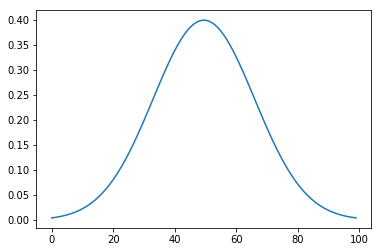

In [26]:
mean = 0
sigma = 1.0

z = (tf.exp(tf.negative(tf.pow(x - mean, 2.0) /
                   (2.0 * tf.pow(sigma, 2.0)))) *
     (1.0 / (sigma * tf.sqrt(2.0 * 3.1415))))

res = z.eval()
plt.plot(res)

# Convolution

## create 2-D Gaussian

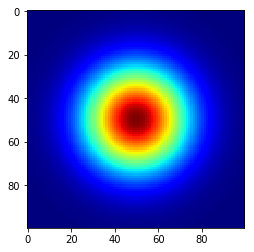

In [35]:
ksize = z.get_shape().as_list()[0]
z_2d = tf.matmul(tf.reshape(z, [ksize, 1]), tf.reshape(z, [1, ksize]))
plt.imshow(z_2d.eval(), cmap='jet')

(512, 512)


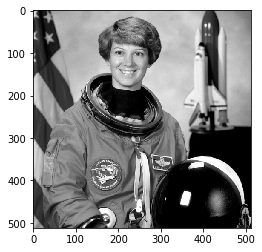

In [28]:
from skimage import data
d = np.mean(data.astronaut(), axis=2)
img = d.astype(np.float32)
plt.imshow(img, cmap='gray')
print(img.shape)

In [29]:
img_4d = img.reshape([1, img.shape[0], img.shape[1], 1])
print(img_4d.shape)

(1, 512, 512, 1)


In [30]:
# but since we'll be using tensorflow, we can use the tensorflow reshape function:
img_4d = tf.reshape(img, [1, img.shape[0], img.shape[1], 1])
print(img_4d)

Tensor("Reshape_2:0", shape=(1, 512, 512, 1), dtype=float32)


In [31]:
# Reshape the 2d kernel to tensorflow's required 4d format: H x W x I x O
z_4d = tf.reshape(z_2d, [ksize, ksize, 1, 1])
print(z_4d.get_shape().as_list())

[100, 100, 1, 1]


In [32]:
convolved = tf.nn.conv2d(img_4d, z_4d, strides=[1, 1, 1, 1], padding='SAME')
res = convolved.eval()
print(res.shape)

(1, 512, 512, 1)


(512, 512)


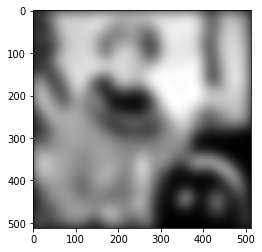

In [33]:
print(res[0, :, :, 0].shape)
plt.imshow(res[0, :, :, 0], cmap='gray')

In [38]:
xs = tf.linspace(-3.0, 3.0, ksize)

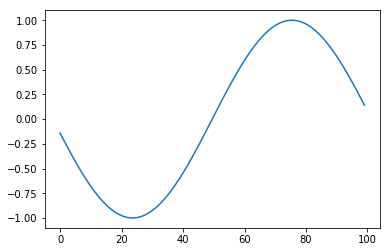

In [39]:
ys = tf.sin(xs)
plt.figure()
plt.plot(ys.eval())

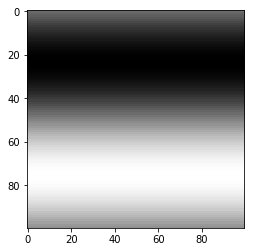

In [40]:
ys = tf.reshape(ys, [ksize, 1])

ones = tf.ones((1, ksize))
wave = tf.matmul(ys, ones)
plt.imshow(wave.eval(), cmap='gray')

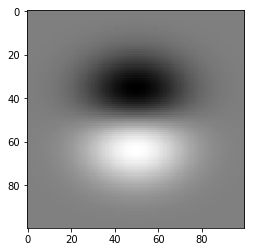

In [41]:
gabor = tf.multiply(wave, z_2d)
plt.imshow(gabor.eval(), cmap='gray')

## placeholders

In [42]:
img = tf.placeholder(tf.float32, shape=[None, None], name='img')

img_3d = tf.expand_dims(img, 2)
dims = img_3d.get_shape()
print(dims)

img_4d = tf.expand_dims(img_3d, 0)
print(img_4d.get_shape().as_list())

mean = tf.placeholder(tf.float32, name='mean')
sigma = tf.placeholder(tf.float32, name='sigma')
ksize = tf.placeholder(tf.int32, name='ksize')

(?, ?, 1)
[1, None, None, 1]


In [43]:
x = tf.linspace(-3.0, 3.0, ksize)

z = (tf.exp(tf.negative(tf.pow(x - mean, 2.0) /
                   (2.0 * tf.pow(sigma, 2.0)))) *
      (1.0 / (sigma * tf.sqrt(2.0 * 3.1415))))

# 2-d gaussian
z_2d = tf.matmul(
  tf.reshape(z, tf.stack([ksize, 1])),
  tf.reshape(z, tf.stack([1, ksize])))

# sine kernel
ys = tf.sin(x)
ys = tf.reshape(ys, tf.stack([ksize, 1]))
ones = tf.ones(tf.stack([1, ksize]))
wave = tf.matmul(ys, ones)

# gabor
gabor = tf.multiply(wave, z_2d)
gabor_4d = tf.reshape(gabor, tf.stack([ksize, ksize, 1, 1]))

convolved = tf.nn.conv2d(img_4d, gabor_4d, strides=[1, 1, 1, 1], padding='SAME', name='convolved')
convolved_img = convolved[0, :, :, 0]

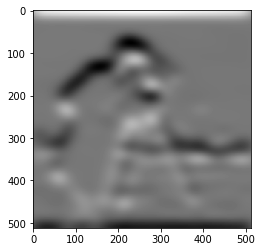

In [45]:
res = convolved_img.eval(feed_dict={
    img: data.camera(), mean:0.0, sigma:1.0, ksize:100})
plt.imshow(res, cmap='gray')

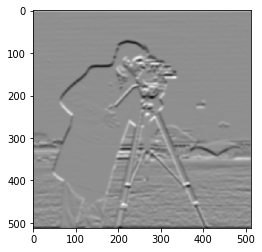

In [46]:
res = convolved_img.eval(feed_dict={
    img: data.camera(),
    mean: 0.0,
    sigma: 0.5,
    ksize: 32
  })
plt.imshow(res, cmap='gray')

# Reading Material

1. Abadi, M., Agarwal, A., Barham, P., Brevdo, E., Chen, Z., Citro, C., … Zheng, X. (2015). TensorFlow : Large-Scale Machine Learning on Heterogeneous Distributed Systems. https://arxiv.org/abs/1603.04467

2. Yoshua Bengio, Aaron Courville, Pascal Vincent. Representation Learning: A Review and New Perspectives. 24 Jun 2012. https://arxiv.org/abs/1206.5538

3. J. Schmidhuber. Deep Learning in Neural Networks: An Overview. Neural Networks, 61, p 85-117, 2015. https://arxiv.org/abs/1404.7828

4. LeCun, Yann, Yoshua Bengio, and Geoffrey Hinton. “Deep learning.” Nature 521, no. 7553 (2015): 436-444.

5. Ian Goodfellow Yoshua Bengio and Aaron Courville. Deep Learning. 2016. http://www.deeplearningbook.org/